In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset


In [2]:
dataset1 = pd.read_csv('application_train.csv')

In [3]:
dataset1.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dataset1.shape

(307511, 122)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import os

import warnings
warnings.filterwarnings('ignore')

In [6]:
# 4-4. find the number and percentage of missing values in each column.    #afarin!

numm=307511-dataset1.count(axis=0)
pm=100*(307511-dataset1.count(axis=0))/307511

missing_values_tabel=pd.DataFrame({'1':numm.values,'Percentage of Missing Values%':pm.values},index=[list(dataset1)]) 
# now we see " the number of related columns" incloding missing values

missing_values_tabel=missing_values_tabel[missing_values_tabel.iloc[:,1]!=0] .sort_values('Percentage of Missing Values%',
                                                                                 ascending=False).round(1)
print('the number of related column (variables) incloding missing values is:\n',len(missing_values_tabel))

# Rename the columns
missing_values_tabel = missing_values_tabel.rename(columns = {'1' : 'Missing_Values'})
missing_values_tabel

the number of related column (variables) incloding missing values is:
 67


,Missing_Values,Percentage of Missing Values%
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [7]:
standarddeviations = dataset1.std().sort_values(ascending=False).round(1)
standarddeviations.head(15)

AMT_CREDIT                    402490.8
AMT_GOODS_PRICE               369446.5
AMT_INCOME_TOTAL              237123.1
DAYS_EMPLOYED                 141275.8
SK_ID_CURR                    102790.2
AMT_ANNUITY                    14493.7
DAYS_BIRTH                      4364.0
DAYS_REGISTRATION               3522.9
DAYS_ID_PUBLISH                 1509.5
DAYS_LAST_PHONE_CHANGE           826.8
OWN_CAR_AGE                       11.9
HOUR_APPR_PROCESS_START            3.3
OBS_30_CNT_SOCIAL_CIRCLE           2.4
OBS_60_CNT_SOCIAL_CIRCLE           2.4
AMT_REQ_CREDIT_BUREAU_YEAR         1.9
dtype: float64

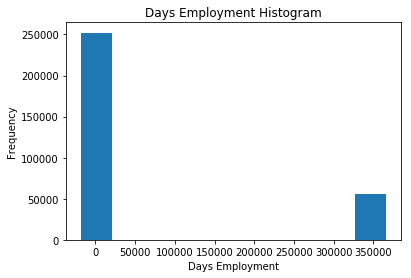

In [8]:
# That doesn't look right! The maximum value (besides being positive) is about 1000 years!
dataset1['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [9]:
# Replace the anomalous values with nan
dataset1['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [10]:
# Correlations
# Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and 
# understand the data is by looking for correlations between the features and the target. We can calculate the Pearson
# correlation coefficient between every variable and the target using the .corr dataframe method.
# The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea
# of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent
# are:
# .00-.19 “very weak”
# .20-.39 “weak”
# .40-.59 “moderate”
# .60-.79 “strong”
# .80-1.0 “very strong”

In [11]:
# Find correlations with the target and sort
correlations = dataset1.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227


In [12]:
# As the client gets older, there is a negative linear relationship with the target meaning that as clients get older,
# they tend to repay their loans on time more often.

In [13]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [14]:
import seaborn as sns

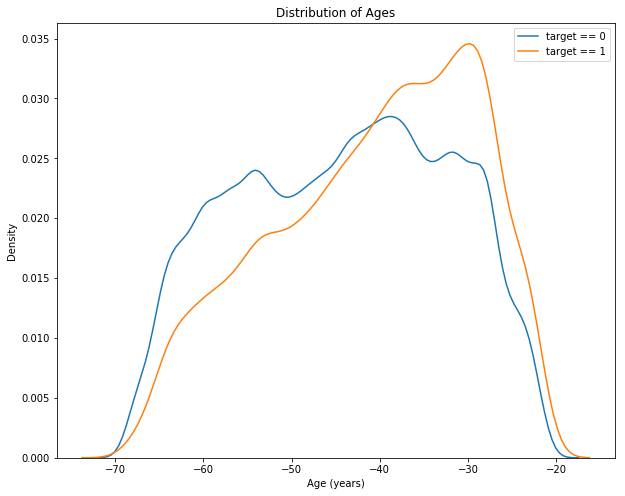

In [15]:
# By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are 
# reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) 
# colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be
# thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then
# averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

plt.figure(figsize = (10, 8))
# KDE plot of loans that were repaid on time
sns.kdeplot(dataset1.loc[dataset1['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(dataset1.loc[dataset1['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

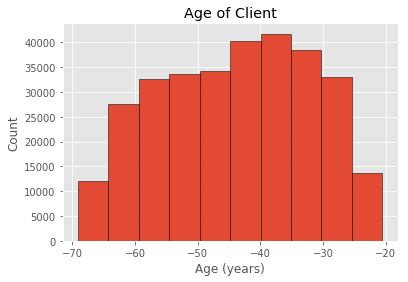

In [16]:
# Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to 
# make the plot a little more understandable.

# Set the style of plots    'bmh', 'dark_background', 'ggplot', 'fivethirtyeight', 'grayscale'
plt.style.use('ggplot')

# Plot the distribution of ages in years
plt.hist(dataset1['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 10)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [17]:
np.linspace(20, 70, num = 11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [18]:
# Age information into a separate dataframe
age_data = dataset1[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(20)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,-25.920548,NaN
1,0,-16765,-45.931507,NaN
2,0,-19046,-52.180822,NaN
3,0,-19005,-52.068493,NaN
4,0,-19932,-54.608219,NaN
5,0,-16941,-46.413699,NaN
6,0,-13778,-37.747945,NaN
7,0,-18850,-51.643836,NaN
8,0,-20099,-55.065753,NaN
9,0,-14469,-39.641096,NaN


In [19]:
# First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

# Extract the EXT_SOURCE variables and show correlations
ext_data = dataset1[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


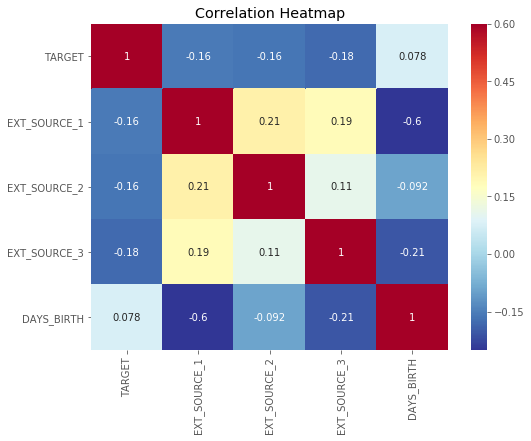

In [20]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

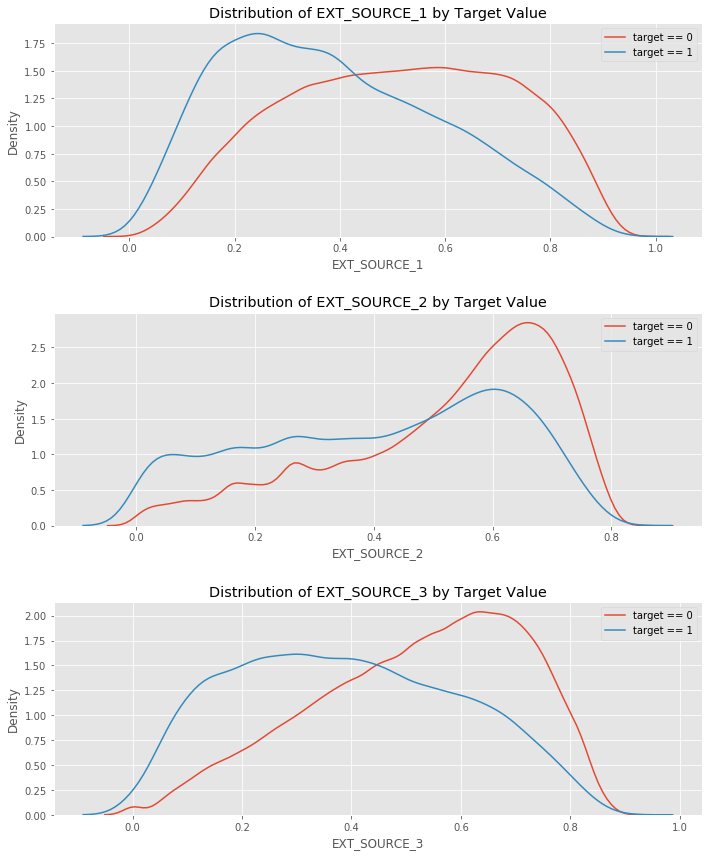

In [21]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(dataset1.loc[dataset1['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(dataset1.loc[dataset1['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

AttributeError: Unknown property height

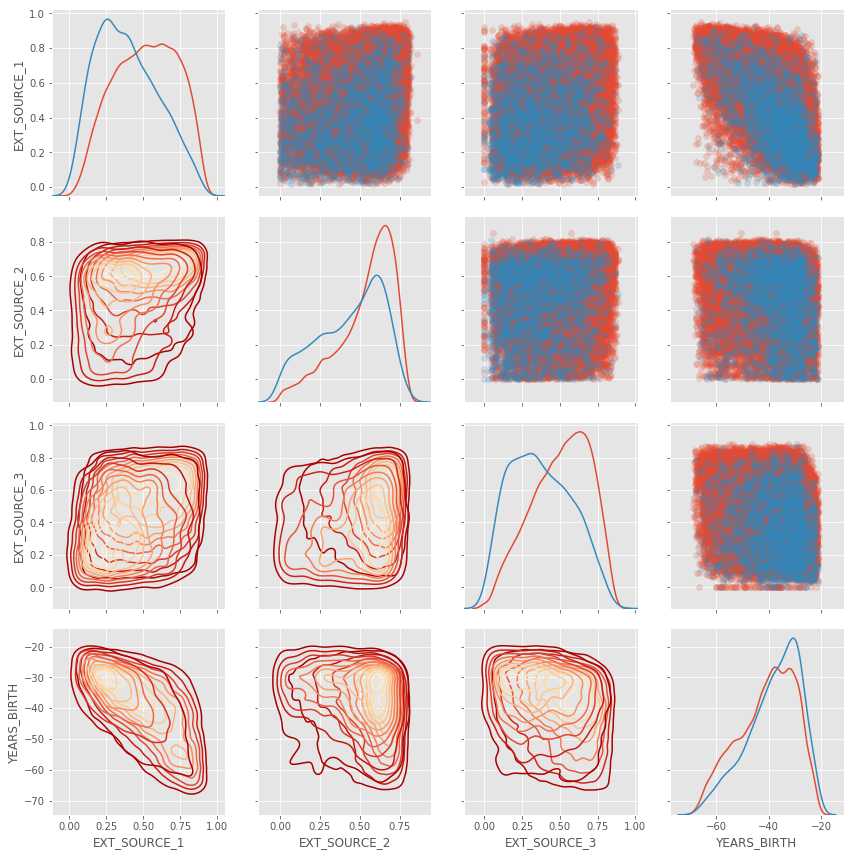

In [22]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', height = 32, y = 1.05);

In [24]:
# Make a new dataframe for polynomial features
poly_features = dataset1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = dataset1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [25]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [26]:
# This creates a considerable number of new features. To get the names we have to use the polynomial features 
# get_feature_names method.
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:35]
# There are 35 features with individual features raised to powers up to degree 3 and interaction terms.

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [27]:
#  Now, we can see whether any of these new features are correlated with the target.
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [28]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = dataset1['SK_ID_CURR']
dataset1_poly = dataset1.merge(poly_features, on = 'SK_ID_CURR', how = 'left')



# Print out the new shapes
print('Training data with polynomial features shape: ', dataset1_poly.shape)


Training data with polynomial features shape:  (307511, 158)


In [29]:
# Domain Knowledge Features
# Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could
# call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that
# attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going 
# to use five features that were inspired by this script by Aguiar:
# CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
# ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
# CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
# DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [30]:
dataset1_domain = dataset1.copy()

dataset1_domain['CREDIT_INCOME_PERCENT'] = dataset1_domain['AMT_CREDIT'] / dataset1_domain['AMT_INCOME_TOTAL']
dataset1_domain['ANNUITY_INCOME_PERCENT'] = dataset1_domain['AMT_ANNUITY'] / dataset1_domain['AMT_INCOME_TOTAL']
dataset1_domain['CREDIT_TERM'] = dataset1_domain['AMT_ANNUITY'] / dataset1_domain['AMT_CREDIT']
dataset1_domain['DAYS_EMPLOYED_PERCENT'] = dataset1_domain['DAYS_EMPLOYED'] / dataset1_domain['DAYS_BIRTH']

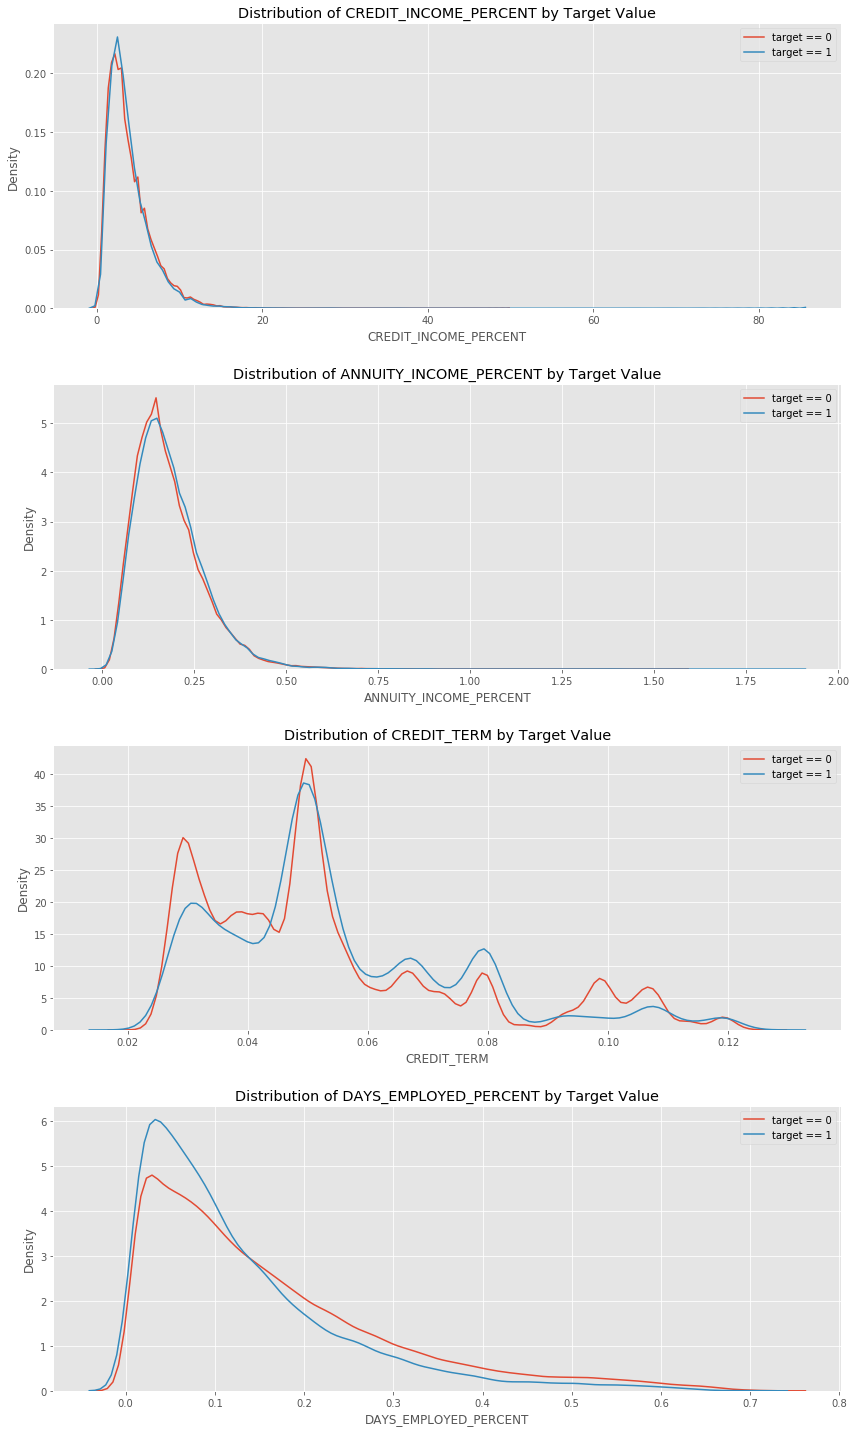

In [31]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(dataset1_domain.loc[dataset1_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(dataset1_domain.loc[dataset1_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [32]:
# 4. find the number and percentage of missing values in each column.    #afarin!

numm=307511-dataset1.count(axis=0)
pm=100*(307511-dataset1.count(axis=0))/307511

missing_values_tabel=pd.DataFrame({'1':numm.values,'Percentage of Missing Values%':pm.values},index=[list(dataset1)]) 
# now we see " the number of related columns" incloding missing values

missing_values_tabel=missing_values_tabel[missing_values_tabel.iloc[:,1]!=0] .sort_values('Percentage of Missing Values%',
                                                                                 ascending=False).round(1)
print('the number of related column (variables) incloding missing values is:\n',len(missing_values_tabel))

# Rename the columns
missing_values_tabel = missing_values_tabel.rename(columns = {'1' : 'Missing_Values'})
missing_values_tabel

the number of related column (variables) incloding missing values is:
 68


,Missing_Values,Percentage of Missing Values%
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [33]:
# Number of unique classes in each object column    IMPORTANT CODE!
dataset1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [34]:
# Create a label encoder object     What is transforming difference????????
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in dataset1:
    if dataset1[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(dataset1[col].unique())) <= 2:
            # Train on the training data
            le.fit(dataset1[col])
            # Transform both training and testing data    # what is difference between fit and transform?
            dataset1[col] = le.transform(dataset1[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [35]:
# Number of each type of column      IMPORTANT!
dataset1.dtypes.value_counts()
#          BEFORE    NOW
# float64    65       65
# int64      41       41
# object     16       13
# int32                3  So we changed 3 object columns with LabelEncoding 
# dtype: int64

float64    66
int64      40
object     13
int32       3
dtype: int64

In [36]:
# one-hot encoding of categorical variables
dataset1 = pd.get_dummies(dataset1)

print('dataset1 Features shape: ', dataset1.shape)

dataset1 Features shape:  (307511, 243)


In [37]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
# if 'TARGET' in dataset1:
#     train = dataset1.drop(columns = ['TARGET'])
# else:
train = dataset1.copy()
    
# Feature names
features = list(train.columns)



# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)

print('Training data shape: ', train.shape)


Training data shape:  (307511, 243)


In [38]:
dataset1.shape

(307511, 243)

In [39]:
# # Apply per-column the median of that columns and fill

# dataset1=dataset1.apply(lambda x: x.fillna(x.median()),axis=0)

In [40]:
X = train[:, 2:244]   # Note that we have to consider one index more in order to include the required index 
y = train[:, 1]       # here we have 122 columns which have index from "0" to "121"

In [41]:
X

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [42]:
y

array([1., 0., 0., ..., 0., 1., 0.])

In [43]:
X.shape

(307511, 241)

In [44]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
#  Understading whether the spliting process looks reasonable
print(y_test.mean())
y_train.mean()

0.082109815781344


0.08038356476212155

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(246008, 241)

In [ ]:
X_test.shape

(61503, 241)

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
# #Initializing Neural Network
# classifier = Sequential()

In [ ]:
# model = Sequential()    # here in Keras we don't write code for input, so we have sequentially layers for
# # hidden and finally for y
# model.add(Dense(units = 241, input_shape =(241,) , activation ='relu'))  # I can consider any number for number of hidden here 4
# # 
# # activation functin = f= : sigmoid, relu, softmax here we consider for all node the same activation
# model.add(Dense(units =1 , activation ='softmax') )   # out put=units   activation softmax because it is classification
# # 3 x 4 + 4 = 16
# # 4 x 2 + 2 = 10

In [ ]:
model = Sequential()    # here in Keras we don't write code for input, so we have sequentially layers for
# hidden and finally for y

# Adding the input layer and the first hidden layer
model.add(Dense(output_dim = 500, init = 'uniform', activation = 'relu', input_dim = 241))
# Adding the second hidden layer
model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
# # Adding the second hidden layer
# model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=241, units=500, kernel_initializer="uniform")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=20, kernel_initializer="uniform")`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
# Compiling Neural Network
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               121000    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                10020     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 131,041
Trainable params: 131,041
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting our model 
model.fit(X_train, y_train, batch_size = 240000, nb_epoch = 5)

Instructions for updating:
Use tf.cast instead.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/5
246008/246008 [==============================] - 12s 48us/step - loss: 0.7012 - acc: 0.1089
Epoch 2/5
246008/246008 [==============================] - 27s 112us/step - loss: 0.6867 - acc: 0.9050
Epoch 3/5


In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
# This is the final step where we are evaluating our model performance. We already have original results and thus
# we can build confusion matrix to check the accuracy of model.
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
# ACC= (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)
(56588+0)/61503  # Awesome, we achieved 91.88% accuracy which is quite good with nan values, now with filling nan
# values with median we get 92.01% Accuracy!! congratulation on your first neural network project! hora!

In [ ]:
# condition positive (P)
# the number of real positive cases in the data
# condition negative (N)
# the number of real negative cases in the data
# true positive (TP)
# eqv. with hit
# true negative (TN)
# eqv. with correct rejection
# false positive (FP)
# eqv. with false alarm, Type I error
# false negative (FN)
# eqv. with miss, Type II error
# sensitivity, recall, hit rate, or true positive rate (TPR)
# TPR= TP/P = TP/(TP+FN) = 1- FNR 
# specificity, selectivity or true negative rate (TNR)
# TNR= TN/N = TN/(TN+FP) = 1- FPR
# precision or positive predictive value (PPV)
# PPV= TP/(TP+FP) = 1- FDR
# negative predictive value (NPV)
# NPV= TN/(TN+FN) = 1- FOR
# miss rate or false negative rate (FNR)
# FNR= FN/P = FN/(FN+TP) = 1- TPR
# fall-out or false positive rate (FPR)
# FPR= FP/N = FP/(FP+TN) = 1- TNR
# false discovery rate (FDR)
# FDR= FP/(FP+TP) = 1- PPV 
# false omission rate (FOR)
# FOR= FN/(FN+TN) = 1- NPV
# accuracy (ACC)
# ACC= (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)
# F1 score is the harmonic mean of precision and sensitivity
# F1= 2TP/(2TP+FP+FN)

In [ ]:
# The ROC Curve
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
# It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC
# curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the
# ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the true
# negative rate, which is the ratio of negative instances that are correctly classified as negative. The TNR
# is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.
# To plot the ROC curve, you first need to compute the TPR and FPR for various threshold values, using the
# roc_curve() function:

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()